# Classical Solution

Alice and Bob might have agreed that, if given the first column, Bob shall fill it with three −1’s. Then, whatever row Alice is given, she must fill it with either {−1, +1, −1} or {−1, −1, +1}. Suppose that Alice decided that she would fill any row in the same way: {−1, −1, +1}. Figure 1 (a) shows how the predefined matrix would look like. Notice that Alice’s rows are already defined, but Bob still has to decide how to fill the second and third columns. He can, and must, fill the second column with three −1’s, so that whatever row Alice is given, the intersection agrees. Intuitively, for the same reason, he should then fill the third column with three +1’s. However, this is not a valid strategy, since the product of the last column will be +1 and not −1, as required. Thus, Bob must fill at least one of the entries of the last column with −1. By doing that, there will be one row and column whose intersection does not agree, and thus one row and column for which Alice and Bob lose, as illustrated in Figure 1 (b).


In [1]:
import numpy as np
import matplotlib.pylab as plt

### Pre-defined strategy

####  Case 1: Both defined their values to match the product condition but we have a mismatch in one cell

In [2]:
# Alice's strategy: Filling rows
alice_rows_mismatch = [[-1, -1, +1], [-1, -1, +1], [-1, -1, +1]]

# Bob's strategy: Filling columns
bob_columns_mismatch = [[-1, -1, -1], [-1, -1, -1], [-1, 1, 1]]

#### Case 2: Both defined their values to match every value, but Bob's column doesn't has the product of -1

In [3]:
# Alice's strategy: Filling rows
alice_rows_product = [[-1, -1, +1], [-1, -1, +1], [-1, -1, +1]]

# Bob's strategy: Filling columns
bob_columns_product = [[-1, -1, -1], [-1, -1, -1], [1, 1, 1]]

### Random/Probabilistic Strategy

In [4]:
# TODO

In [5]:
def plot_magic_square(matrix, lost_cell=None):
    # Create a 3x3 grid
    fig, ax = plt.subplots(figsize=(3,3))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

    # Color the cells
    colors = [['white' if val == 0 else 'green' for val in row] for row in matrix]
    if lost_cell: colors[lost_cell[0]][lost_cell[1]] = 'red' #TODO: Color the whole column/line if the product doesn't result in the expected value

    table = ax.table(cellText=matrix, cellColours=colors, cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

    # Set cell text properties
    for cell in table.get_children():
        if isinstance(cell, plt.Text):
            cell.set_fontsize(20)

    # Show the plot
    plt.show()

In [12]:
import random

def play_magic_square_game(alice_rows, bob_columns):
    #Check if Alice and Bob Won the round
    won = 0

    # If they lost due to a mismatch, save the corresponding match cell
    lost_cell = [-1,-1]

    # Initialize the 3x3 matrix
    matrix = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]


    # Play the game for three rounds
    for round_num in range(3):
        # Assign a row to Alice
        alice_row = alice_rows[round_num]

        # Assign a column to Bob
        bob_column = random.choice(bob_columns)

        # Fill the matrix with Alice's row
        matrix[round_num] = alice_row

        # Fill the matrix with Bob's column
        for i in range(3):
            if matrix[i][round_num] != 0 and matrix[i][round_num] != bob_column[i]:
              won = -1;
              lost_cell = [i,round_num]

            matrix[i][round_num] = bob_column[i]

        if won == -1:
          print("Round", round_num + 1, "lost due to mismatch cell!")
          plot_magic_square(matrix, lost_cell)
          break
          continue

        # Check if Alice and Bob won the round
        alice_product = matrix[round_num][0] * matrix[round_num][1] * matrix[round_num][2]
        bob_product = matrix[0][round_num] * matrix[1][round_num] * matrix[2][round_num]

        if alice_product == 1 and bob_product == -1 and alice_row[round_num] == bob_column[round_num]:
            print("Round", round_num + 1, "won!")
            plot_magic_square(matrix)
        else:
            print("Round", round_num + 1, "lost!")
            plot_magic_square(matrix)
            break

Round 1 won!


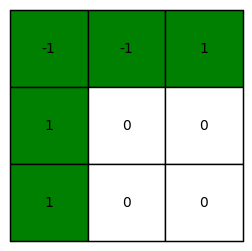

Round 2 lost!


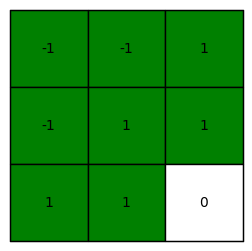

In [13]:
# Play the Magic Square game: Deterministic Pre-defined Mismatch
play_magic_square_game(alice_rows_mismatch, bob_columns_mismatch)

Round 1 lost!


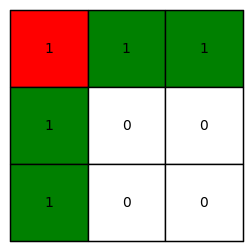

In [11]:
# Play the Magic Square game: Deterministic Pre-defined Product Error
play_magic_square_game(alice_rows_product, bob_columns_product)